$\text{}$

$$\LARGE\text{Assignment: Statistical Principles}$$

$$\large\text{Qianlang Chen (u1172983)}$$

$$\text{CS 5140 Spring 2021}$$

$\text{}$

# Problem 1

In [22]:
# The size of the domain in question.
n = 3000

## Part A



In [26]:
import random

# Runs the experiment of generating random numbers in the range [0, n)
# until two numbers generated equal. Returns the value `k` where the
# k-th number equals to one of the numbers generated before.
def experiment(n):
    generated = set()
    for k in range(1, n + 1):
        x = random.randint(0, n - 1)
        if x in generated: return k
        generated.add(x)

# Run the experiment once and report the k-value.
k = experiment(n)
print(f'Running the experiment once took {k} random trials')

Running the experiment once took 82 random trials


## Part B

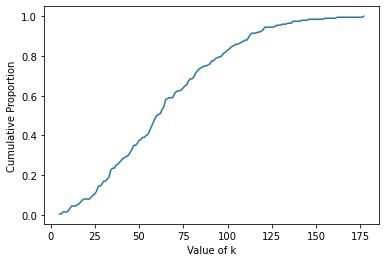

In [27]:
import itertools
from matplotlib import pyplot

# The number of experiments to run.
m = 200

# Run the experiment `m` times and record the frequency for each value 
# of `k`.
k_freq = {}
for _ in range(m):
    k = experiment(n)
    k_freq[k] = k_freq.get(k, 0) + 1

# Plot the k-frequencies.
X = list(range(min(k_freq.keys()), max(k_freq.keys()) + 1))
Y = list(itertools.accumulate(k_freq.get(x, 0) / m for x in X))
pyplot.xlabel('Value of k')
pyplot.ylabel('Cumulative Proportion')
pyplot.plot(X, Y)


## Part C

In [28]:
k_bar = sum(k * x for k, x in k_freq.items()) / m
print(f'Empirical estimate of the expected value of `k`: {k_bar}')

Empirical estimate of the expected value of `k`: 65.37


## Part D

In the implementation of the experiment:

  * I used a hash-set to keep track of the numbers that had appeared (been randomly generated);
  
  * I kept generating random numbers until the first time a number generated exists in that hash-set;

  * When the above happened, I immediately terminated the experiment and reported the number of trails it took.

In [31]:
import time

# Returns the time in seconds that running an experiment with some
# values of `n` and `m` takes.
def time_experiment(n, m):
    start_time = time.time()
    while time.time() - start_time < .25: pass # warm-up loop
    start_time = time.time()
    for _ in range(m): experiment(n)
    return time.time() - start_time

t = time_experiment(n, m)
print(f'The experiment with n={n} and m={m} took {t:.3f} s')

The experiment with n=3000 and m=200 took 0.015 s


Now, for more values of $n$ and $m$:

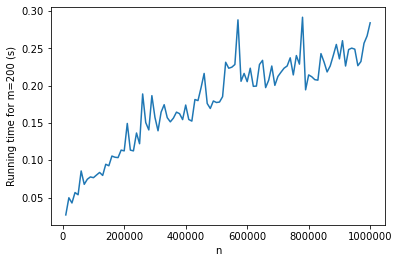

In [40]:
def time_m(m):
    X = list(range(10**4, 10**6 + 1, 10**4))
    Y = list(time_experiment(x, m) for x in X)
    pyplot.ticklabel_format(useOffset=False, style='plain')
    pyplot.xlabel('n')
    pyplot.ylabel(f'Running time for m={m} (s)')
    pyplot.plot(X, Y)

time_m(200)

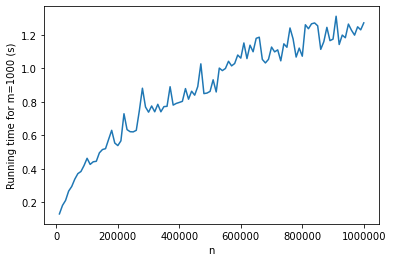

In [41]:
time_m(10**3)

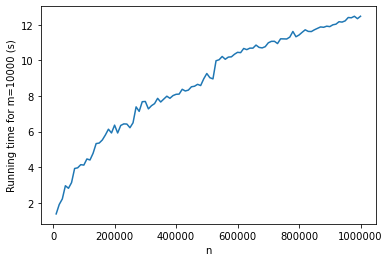

In [42]:
time_m(10**4)

$\pagebreak$

# Problem 2

In [33]:
# The size of the domain in question.
n = 200

## Part A

In [57]:
import itertools, random

# Runs the experiment of generating random numbers in the range [0, n)
# until every possible number has been generated. Returns the value `k`
# where as of the k-th generation, all possible numbers have been
# generated.
def experiment(n):
    not_generated = {x for x in range(n)}
    for k in itertools.count(1):
        x = random.randint(0, n - 1)
        not_generated.discard(x)
        if not not_generated: return k

# Run the experiment once and report the k-value.
k = experiment(n)
print(f'Running the experiment once took {k} random trials')

Running the experiment once took 1126 random trials


## Part B

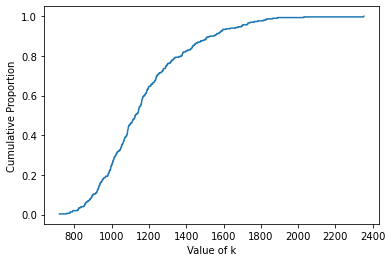

In [51]:
from matplotlib import pyplot

# The number of experiments to run.
m = 300

# Run the experiment `m` times and record the frequency for each value 
# of `k`.
k_freq = {}
for _ in range(m):
    k = experiment(n)
    k_freq[k] = k_freq.get(k, 0) + 1

# Plot the k-frequencies.
X = list(range(min(k_freq.keys()), max(k_freq.keys()) + 1))
Y = list(itertools.accumulate(k_freq.get(x, 0) / m for x in X))
pyplot.xlabel('Value of k')
pyplot.ylabel('Cumulative Proportion')
pyplot.plot(X, Y)

## Part C

In [52]:
k_bar = sum(k * x for k, x in k_freq.items()) / m
print(f'Empirical estimate of the expected value of `k`: {k_bar}')

Empirical estimate of the expected value of `k`: 1176.1733333333334


## Part D

In the implementation of the experiment:

  * I used a hash-set to keep track of the numbers that had *not yet* appeared (*not* been randomly generated);
  
  * I kept generating random numbers until that hash-set became empty, meaning that all possible numbers had been generated;

  * When the above happened, I immediately terminated the experiment and reported the number of trails it took.

In [53]:
import time

# Returns the time in seconds that running an experiment with some
# values of `n` and `m` takes.
def time_experiment(n, m):
    start_time = time.time()
    while time.time() - start_time < .25: pass # warm-up loop
    start_time = time.time()
    for _ in range(m): experiment(n)
    return time.time() - start_time

t = time_experiment(n, m)
print(f'The experiment with n={n} and m={m} took {t:.3f} s')

The experiment with n=200 and m=300 took 0.319 s


Now, for more values of $n$ and $m$:

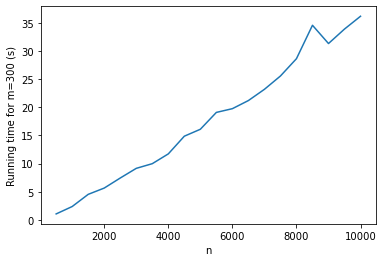

In [54]:
def time_m(m):
    X = list(range(500, 10**4 + 1, 500))
    Y = list(time_experiment(x, m) for x in X)
    pyplot.ticklabel_format(useOffset=False, style='plain')
    pyplot.xlabel('n')
    pyplot.ylabel(f'Running time for m={m} (s)')
    pyplot.plot(X, Y)

time_m(300)

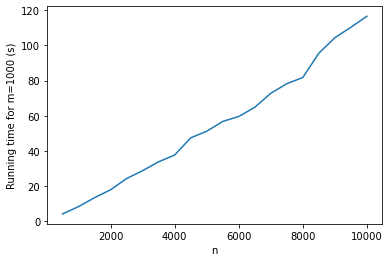

In [55]:
time_m(1000)

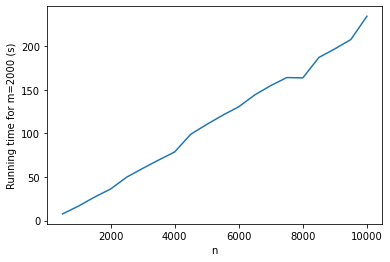

In [56]:
time_m(2000)

<!--$\pagebreak$-->

# Problem 3

## Part A

I will use Method 1 from the lecture to estimate the actual expected value of $k$:
$$
\begin{aligned}
  \text{Pr}(\text{Collision with }k\text{ objects in a domain sized }n) &\approx 1 - \left(1 - \frac{1}{n}\right)^{k^2/2}\\
  \frac{1}{2} &\approx 1 - \left(1 - \frac{1}{3000}\right)^{k^2/2}\\
  \frac{k^2}{2} &\approx \log\left(\frac{1}{2}, \frac{2999}{3000}\right)\\
  k &\approx \sqrt{2\log\left(\frac{1}{2}, \frac{2999}{3000}\right)}\\
  &\approx \boxed{64.48}
\end{aligned}
$$

Therefore, after generating about 65 random numbers, we can expect the probability that two of the random numbers equal to be more than 50%. This result is reasonably close to the estimate from *Problem 1-C* (65.37).

## Part B

I will use the (only) method from the lecture to estimate the actual expected value of $k$:
$$
\begin{aligned}
  \text{E}[k] &= n \cdot \sum_{i=1}^{n} \frac{1}{i}\\
  &= 200 \cdot \sum_{i=1}^{200} \frac{1}{i}\\
  &= 200 \cdot \left(1 + \frac{1}{2} + \cdots + \frac{1}{200}\right)\\
  &\approx \boxed{1176}
\end{aligned}
$$

Therefore, we can expect to see every possiblility being generated after generating about 1176 random numbers, which is reasonably close to the estimate from *Problem 2-C* (1176).

<!-- $\pagebreak$ -->

# Problem 4

Assume that the random numbers are generated from the domain $\{1, \cdots, n\}$, which has size $n$. Now, $f_i$ represents the number of trials that generate the number $i$, where $1 \le i \le n$.
$$
\begin{aligned}
  \text{Pr}\left[\left|\mu - \frac{1}{n}\right| \ge \varepsilon\right] &= \text{Pr}\left[\exists\ i \in \{1, \cdots, n\}, \left|\frac{f_i}{k} - \frac{1}{n}\right| \ge \varepsilon\right]\\
  &= \text{Pr}\left[\left(\left|\frac{f_1}{k} - \frac{1}{n}\right| \ge \varepsilon\right) \cup \cdots \cup \left(\left|\frac{f_n}{k} - \frac{1}{n}\right| \ge \varepsilon\right)\right]\\
  &\le \text{Pr}\left[\left|\frac{f_1}{k} - \frac{1}{n}\right| \ge \varepsilon\right] + \cdots + \text{Pr}\left[\left|\frac{f_n}{k} - \frac{1}{n}\right| \ge \varepsilon\right]
\end{aligned}
$$

The above is true because the events $|f_i/k - 1/n| \ge \varepsilon$ for any $i$ are not disjoint, meaning that there could be more than one values of $i$ where such an event is true. In other words, there could be more than one numbers in $\{1, \cdots, n\}$ that occur more often than $\varepsilon + 1/n$.

Suppose that $\text{Pr}[|f_i/k - 1/n| \ge \varepsilon] \le .02/n$ for all $i$. This would directly imply that
$$
\text{Pr}\left[\left|\frac{f_1}{k} - \frac{1}{n}\right| \ge \varepsilon\right] + \cdots + \text{Pr}\left[\left|\frac{f_n}{k} - \frac{1}{n}\right| \ge \varepsilon\right] \le n \cdot \frac{.02}{n} = .02
$$

And thus, $\text{Pr}[|\mu - 1/n| \ge \varepsilon] \le .02$.

Now, in order for $\text{Pr}[|f_i/k - 1/n| \ge \varepsilon] \le .02/n$ to be true for any $i$, first, notice that
$$
\text{Pr}\left[\left|\frac{f_i}{k} - \frac{1}{n}\right| \ge \varepsilon\right] = \text{Pr}\left[\left|f_i - \frac{k}{n}\right| \ge k\varepsilon\right]
$$

Consider a Chebyshev's Inequality for the variable $X = f_i$; specifically,
$$
\begin{aligned}
  \text{E}[X] &= \text{E}[f_i] = \frac{k}{n},\\
  \text{Var}[X] &= \text{Var}[f_i] = \text{Var}\left[\text{Binom}\left(k, \frac{1}{n}\right)\right] = k \cdot \frac{1}{n} \cdot \frac{n - 1}{n} = \frac{k(n - 1)}{n^2}
\end{aligned}
$$

Therefore,
$$
\begin{aligned}
  \text{Pr}[|X - \text{E}[X]| \ge \varepsilon] &\le \frac{\text{Var}[X]}{\varepsilon^2}\\
  \text{Pr}\left[\left|f_i - \frac{k}{n}\right| \ge k\varepsilon\right] &\le \frac{k(n - 1)}{n^2(k\varepsilon)^2} \le \frac{.02}{n}\\
  \frac{n - 1}{nk\varepsilon^2} &\le .02\\
  k &\ge \boxed{\frac{n - 1}{.02n\varepsilon^2}}
\end{aligned}
$$

By similar reasoning,
$$
\text{Pr}\left[\left|\mu - \frac{1}{n}\right| \ge \varepsilon\right] \le .002 \implies k \ge \frac{n - 1}{.002n\varepsilon^2}
$$